In [181]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from random import randint,choice
import numpy as np

In [182]:
alice_bits=[]
for i in range(5):
    alice_bits.append(randint(0,1))
print(alice_bits)

alice_choices=[]
for i in range(5):
    alice_choices.append(choice(['NS','S']))
print(alice_choices)

[0, 1, 0, 1, 1]
['S', 'NS', 'NS', 'NS', 'NS']


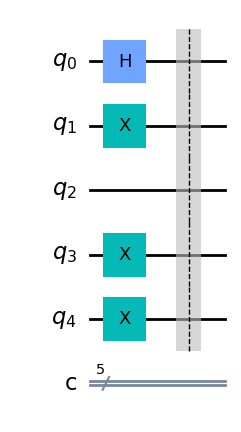

In [183]:
encoded_qubits=[] 

qc=QuantumCircuit(len(alice_bits),len(alice_bits))

for i in range(len(alice_bits)):
    if alice_bits[i]==1:
        qc.x(i)

    if alice_choices[i]=='S':
        qc.h(i)

qc.barrier()
qc.draw()

In [184]:
print("Alice created the key:",str(alice_bits))
print("She made the following choices:",str(alice_choices))
print("Now, Alice 'sends' her qubits to Bob")

Alice created the key: [0, 1, 0, 1, 1]
She made the following choices: ['S', 'NS', 'NS', 'NS', 'NS']
Now, Alice 'sends' her qubits to Bob


EVE INTERCEPTS!


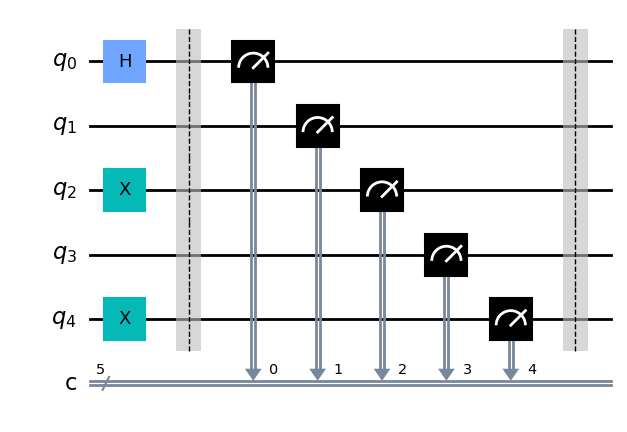

In [170]:
print("EVE INTERCEPTS!")

for i in range(len(alice_bits)):
    qc.measure(i,i)
    
qc.barrier()
qc.draw()

In [171]:
# EVE FOLLOWS
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend=backend,shots=1,memory=True)
result=job.result()
counts=result.get_counts()
print("Eve measured:",counts)

Eve measured: {'10100': 1}


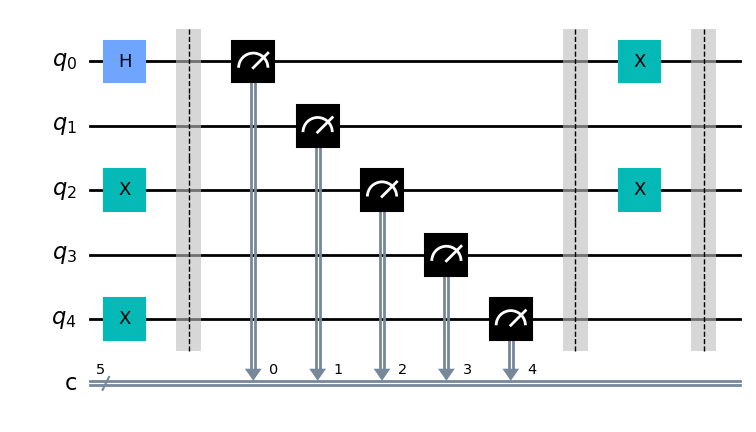

In [172]:
# EVE MUST PREPARE NEW QUBITS TO BE SENT BASED ON HER MEASUREMENTS
result=list(counts.keys())[0]
for i in range(len(result)):
    if result[i]=='1':
        qc.x(i)

qc.barrier()
qc.draw()

In [185]:
bob_choices=[]
for i in range(5):
    bob_choices.append(choice(['NS','S']))
print(bob_choices)

['NS', 'NS', 'NS', 'NS', 'S']


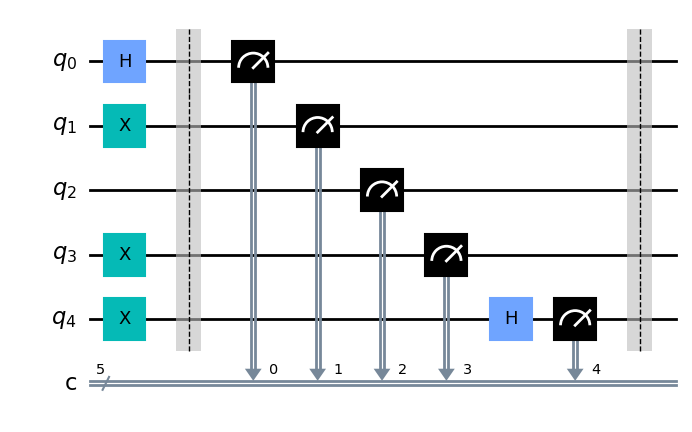

In [186]:
# BOB RECEIVES THE QUBITS, UNAWARE OF EVE'S INTERCEPTION

for i in range(len(bob_choices)):
    if bob_choices[i]=='S':
        qc.h(i)

    qc.measure(i,i)
    
qc.barrier()
qc.draw()

In [190]:
bob_bits=[]

backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend=backend,shots=1,memory=True)
result=job.result()
counts=result.get_counts()

print("Bob made the following choices before measuring:",str(bob_choices))
print("He measured:",counts)

result=list(counts.keys())[0]
for i in range(len(result)):
    bob_bits.append(int(result[i]))

Bob made the following choices before measuring: ['NS', 'NS', 'NS', 'NS', 'S']
He measured: {'11010': 1}


In [191]:
# NOW, ALICE "CALLS" BOB AND THEY COMPARE THEIR CHOICES FOR SUPERPOSITION BITS

alice_key=[]
for q in range(len(alice_choices)):
    if alice_choices[q]==bob_choices[q]:
        alice_key.append(alice_bits[q])

bob_key=[]
for q in range(len(bob_choices)):
    if alice_choices[q]==bob_choices[q]:
        bob_key.append(bob_bits[q])

print("Alice calls Bob and they compare their choices for superposition bits")
print("Based on this, Alice says:")

if alice_key[0]==bob_key[0]:
    print("SECURE! Let's use this key without the 0th bit:",str(alice_key))
else:
    print("EVE DETECTED! Let's use another quantum channel.")

[1, 0, 1]
[1, 0, 1]
Alice calls Bob and they compare their choices for superposition bits
Based on this, Alice says:
SECURE! Let's use this key without the 0th bit: [1, 0, 1]
